In [1]:
import numpy as np
import cv2 as cv
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
img = cv2.imread('./dataset/virat_kohli/v.jpg')
img.shape


(1038, 1600, 3)

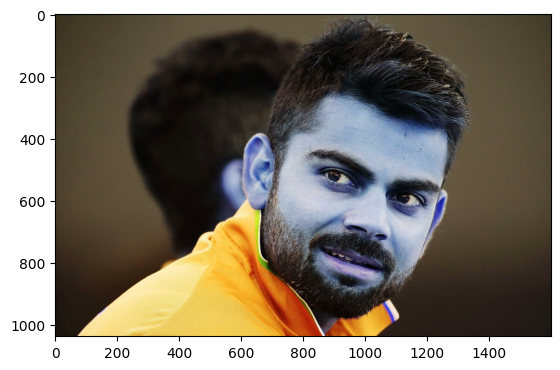

In [70]:
plt.imshow(img)

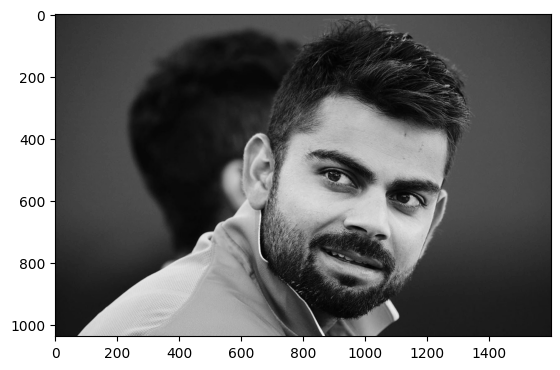

In [28]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray.shape
gray
plt.imshow(gray, cmap ='gray')

In [9]:
face_haar_cascade = cv.CascadeClassifier('./openCV/Haarcascade_frontalface_default.xml') 
eyes_haar_cascade = cv.CascadeClassifier('./openCV/Haarcascade_eye.xml') 

In [37]:
faces = face_haar_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[670, 285, 671, 671]], dtype=int32)

In [38]:
(x,y,w,h) = faces[0]
x,y,w,h

(670, 285, 671, 671)

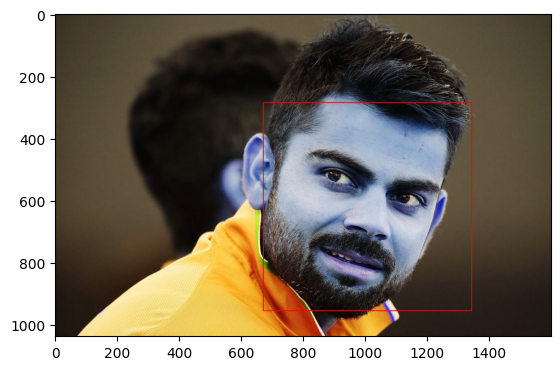

In [40]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [2]:
cv.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eyes_haar_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

NameError: name 'faces' is not defined

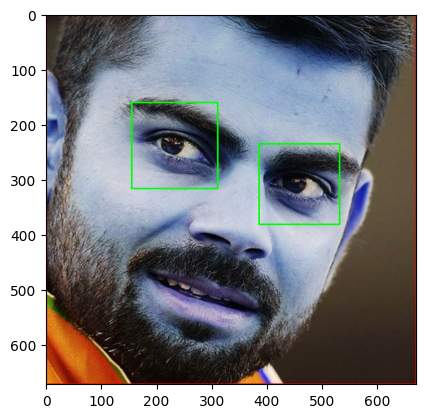

In [44]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [3]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_haar_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyes_haar_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

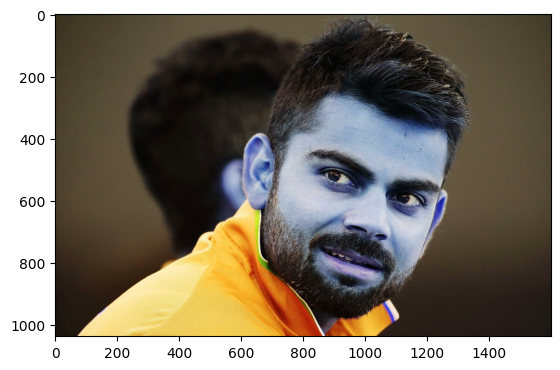

In [121]:
original_image = cv.imread('./dataset/virat_kohli/v.jpg')

plt.imshow(original_image)

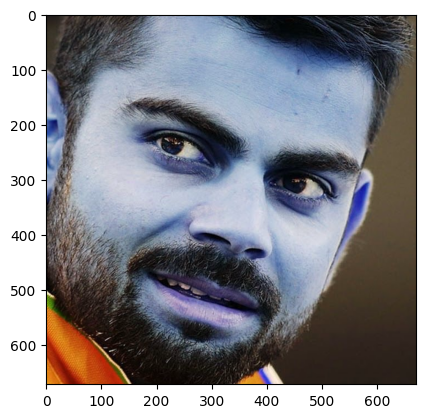

In [122]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/virat_kohli/v.jpg')
plt.imshow(cropped_image)

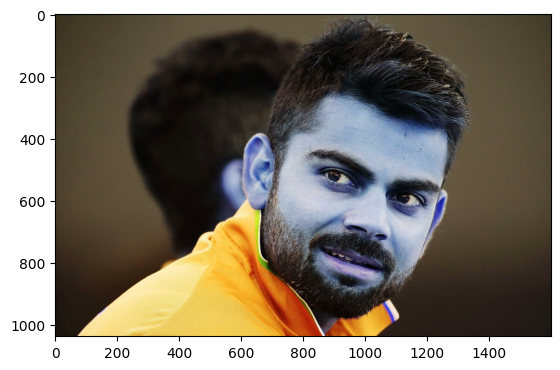

In [123]:
org_image_obstructed = cv2.imread('./dataset/virat_kohli/v.jpg')
plt.imshow(org_image_obstructed)

In [29]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./dataset/maria/2900.jpg')
cropped_image_no_2_eyes

In [30]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [31]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [37]:
img_dirs

['./dataset/virat_kohli',
 './dataset/lionel_messi',
 './dataset/maria',
 './dataset/serena_williams',
 './dataset/roger_federer']

In [51]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [52]:
cropped_image_dirs = []
celebrity_file_names_dict = {}    

In [59]:
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        if '.jpg' in entry.path:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria
Generating cropped images in folder:  ./dataset/cropped/maria
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer


In [111]:
celebrity_file_names_dict

{'virat_kohli': ['./dataset/cropped/virat_kohli/virat_kohli1.png',
  './dataset/cropped/virat_kohli/virat_kohli2.png',
  './dataset/cropped/virat_kohli/virat_kohli3.png',
  './dataset/cropped/virat_kohli/virat_kohli4.png',
  './dataset/cropped/virat_kohli/virat_kohli5.png',
  './dataset/cropped/virat_kohli/virat_kohli6.png',
  './dataset/cropped/virat_kohli/virat_kohli7.png',
  './dataset/cropped/virat_kohli/virat_kohli8.png',
  './dataset/cropped/virat_kohli/virat_kohli9.png',
  './dataset/cropped/virat_kohli/virat_kohli10.png',
  './dataset/cropped/virat_kohli/virat_kohli11.png',
  './dataset/cropped/virat_kohli/virat_kohli12.png',
  './dataset/cropped/virat_kohli/virat_kohli13.png',
  './dataset/cropped/virat_kohli/virat_kohli14.png',
  './dataset/cropped/virat_kohli/virat_kohli15.png',
  './dataset/cropped/virat_kohli/virat_kohli16.png',
  './dataset/cropped/virat_kohli/virat_kohli17.png',
  './dataset/cropped/virat_kohli/virat_kohli18.png',
  './dataset/cropped/virat_kohli/virat_k

In [112]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [114]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'virat_kohli': 0,
 'lionel_messi': 1,
 'maria': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [150]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [151]:
len(X)

190

In [152]:
len(y)

190

In [153]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [156]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(190, 4096)

# Training Model

In [157]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7708333333333334

In [169]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.75      0.86      0.80         7
           2       1.00      1.00      1.00        13
           3       0.46      0.75      0.57         8
           4       1.00      0.50      0.67         8

    accuracy                           0.77        48
   macro avg       0.80      0.75      0.75        48
weighted avg       0.82      0.77      0.78        48



# Grid Search CV to fine tune

In [170]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [171]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [174]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Pytho

In [175]:
df

,model,best_score,best_params
0,svm,0.767488,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.661576,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.823645,{'logisticregression__C': 5}


In [187]:
reg = LogisticRegression(solver='liblinear',multi_class='auto', C=10)
reg.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='auto', solver='liblinear')

In [188]:
reg.score(X_test,y_test)

0.7708333333333334

In [191]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8541666666666666

In [194]:
best_clf = best_estimators['logistic_regression']

In [198]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 8,  1,  0,  2,  1],
       [ 0,  7,  0,  0,  0],
       [ 0,  0, 12,  1,  0],
       [ 0,  1,  0,  7,  0],
       [ 0,  0,  0,  1,  7]])

Text(95.72222222222221, 0.5, 'Truth')

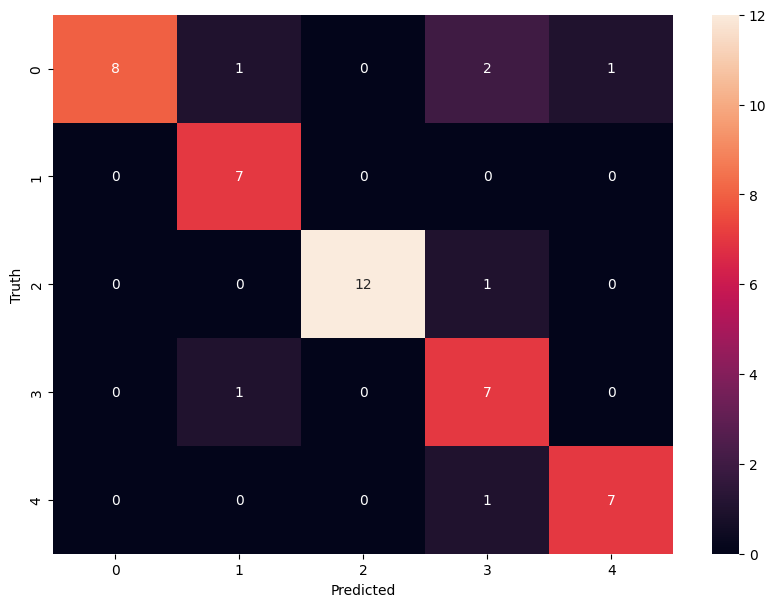

In [200]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [201]:
class_dict

{'virat_kohli': 0,
 'lionel_messi': 1,
 'maria': 2,
 'serena_williams': 3,
 'roger_federer': 4}

# Saving Model

In [206]:
import joblib
joblib.dump(best_clf,'save_model.pk1')

['save_model.pk1']

In [ ]:
import json